In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("segmented_customers.csv")

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


In [4]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,38.850000,60.560000,50.200000,2.24500
std,57.879185,13.969007,26.264721,25.823522,1.81423
min,1.000000,18.000000,15.000000,1.000000,0.00000
25%,50.750000,28.750000,41.500000,34.750000,1.00000
50%,100.500000,36.000000,61.500000,50.000000,2.00000
75%,150.250000,49.000000,78.000000,73.000000,4.00000
max,200.000000,70.000000,137.000000,99.000000,5.00000


In [8]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
cluster                   False
dtype: bool

In [9]:
x = df.iloc[:, [3,4]].values

In [10]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
from sklearn.cluster import KMeans

In [14]:
 blnk=[]

In [16]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ="k-means++",random_state =0)
    kmeans.fit(x)
    blnk.append(kmeans.inertia_)

C:\Users\tarak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

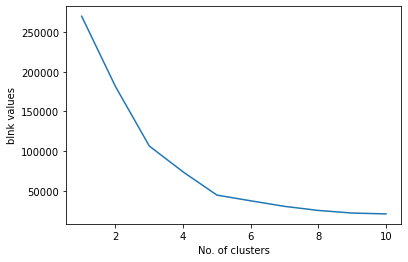

In [19]:
plt.plot(range(1,11),blnk) 
plt.xlabel("No. of clusters") 
plt.ylabel("blnk values") 
plt.show

In [22]:
kmeansmodel = KMeans(n_clusters = 5, init = "k-means++",random_state=0)

In [23]:
y_kmeans = kmeansmodel.fit_predict(x)

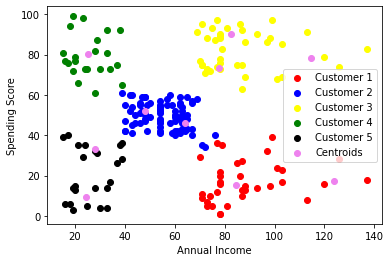

In [30]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],c = 'red', label = 'Customer 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],c = 'blue', label = 'Customer 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],c = 'yellow', label = 'Customer 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],c = 'green', label = 'Customer 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],c = 'black', label = 'Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c ='violet', label = 'Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()